### Chennai Housing Prices Prediction

The dataset contains information related to all real estate transactions that have taken place under the ChennaiEstate. The following are the details relating to the columns in the dataset:

PRTID – The Property Transaction ID assigned by Chennai Estate AREA – The property in which the real estate is located INTSQFT – The interior Sq. Ft of the property
DATESALE – The date the property was sold DISTMAINROAD – The distance of the property to the main road
NBEDROOM – The number of Bedrooms NBATHROOM - The number of bathrooms
NROOM – Total Number of Rooms SALECOND – The Sale Condition
Normal: Normal Sale
Abnormal: Abnormal Sale - trade, foreclosure, short sale
AdjLand: Adjoining Land Purchase
Family: Sale between family members
Partial: Home was not completed when last assessed
PARKFACIL – Whether parking facility is available DATEBUILD – The date in which the property was built
BUILDTYPE – The type of building
House
Commercial
Others
UTILITYAVAIL AllPub: All public Utilities (E,G,W,& S) NoSewr: Electricity, Gas, and Water (Septic Tank) NoSeWa: Electricity and Gas Only ELO: Electricity only STREET Gravel Paved No Access MZZONE A: Agriculture C: Commercial I: Industrial RH: Residential High Density RL: Residential Low Density RM: Residential Medium Density QSROOMS – The quality score assigned for rooms based on buyer reviews
QSBATHROOM – The quality score assigned for bathroom based on buyer reviews QSBEDROOM – The quality score assigned for bedroom based on buyer reviews
QSOVERALL – The Overall quality score assigned for the property REGFEE – The registration fee for the property
COMMIS – The Commission paid to the agent
SALES_PRICE – The total sale price of the property

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Online Course/Projects/Datasets/Chennai Housing Prices/train.csv")

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

<AxesSubplot:>

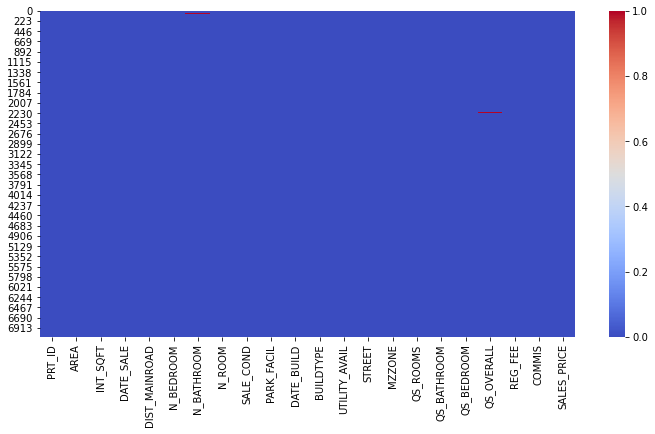

In [7]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(),cmap='coolwarm')

In [8]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE      1.000000
REG_FEE          0.878148
COMMIS           0.626275
INT_SQFT         0.612125
N_ROOM           0.602760
N_BEDROOM        0.330999
N_BATHROOM       0.108884
QS_ROOMS         0.021967
QS_OVERALL       0.020556
QS_BEDROOM       0.018804
DIST_MAINROAD    0.018783
QS_BATHROOM     -0.011377
Name: SALES_PRICE, dtype: float64

In [9]:
df.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786348,0.515390,0.951279,0.019850,-0.008337,0.008865,0.014025,0.657544,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002566,0.001970,0.002301,0.002237,-0.029468,0.001554,-0.017313,0.011600,0.010994,0.018783
N_BEDROOM,0.786348,-0.002566,1.000000,0.755214,0.840286,0.015112,-0.007635,0.015569,0.014209,0.455357,0.430424,0.330999
N_BATHROOM,0.515390,0.001970,0.755214,1.000000,0.568688,0.013112,-0.012057,0.013196,0.007907,0.260324,0.256533,0.108884
N_ROOM,0.951279,0.002301,0.840286,0.568688,1.000000,0.016524,-0.007545,0.015072,0.015459,0.630932,0.533343,0.602760
QS_ROOMS,0.019850,0.002237,0.015112,0.013112,0.016524,1.000000,0.008828,0.007789,0.517741,0.019739,0.009377,0.021967
QS_BATHROOM,-0.008337,-0.029468,-0.007635,-0.012057,-0.007545,0.008828,1.000000,-0.011745,0.551125,-0.006719,-0.000471,-0.011377
QS_BEDROOM,0.008865,0.001554,0.015569,0.013196,0.015072,0.007789,-0.011745,1.000000,0.630447,0.021526,0.020118,0.018804
QS_OVERALL,0.014025,-0.017313,0.014209,0.007907,0.015459,0.517741,0.551125,0.630447,1.000000,0.022482,0.017004,0.020556
REG_FEE,0.657544,0.011600,0.455357,0.260324,0.630932,0.019739,-0.006719,0.021526,0.022482,1.000000,0.659903,0.878148


In [10]:
df['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [11]:
df.shape

(7109, 22)

In [12]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [13]:
for i in range(len(df)):
    if (pd.isnull(df['QS_OVERALL'][i])==True):
        df['QS_OVERALL'][i] = (df['QS_BEDROOM'][i] + df['QS_BATHROOM'][i] + df['QS_ROOMS'][i]) / 3

C:\Users\Karthikeyan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
#null_index = df[df['QS_OVERALL'].isna()].index.values

In [17]:
#df['QS_OVERALL'] = (df['QS_BEDROOM'] + df['QS_BATHROOM'] + df['QS_ROOMS']) / 3  

In [18]:
df.shape

(7103, 22)

In [19]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [20]:
park_facil={'Yes':1,'No':0}
df['PARK_FACIL'] = df['PARK_FACIL'].map(park_facil)

In [21]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,1.0,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,0.0,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,1.0,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,0.0,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,1.0,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

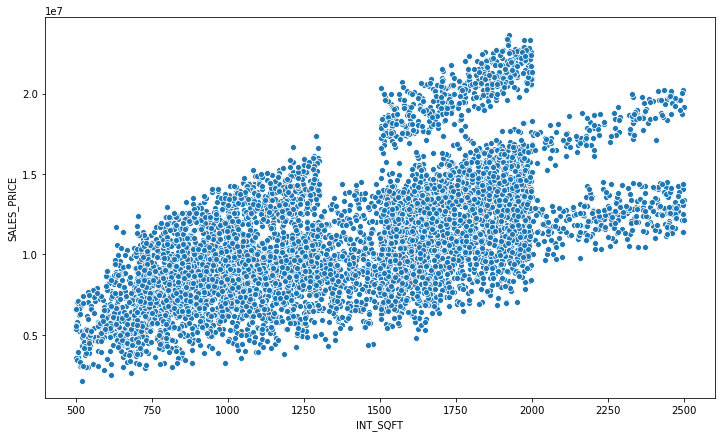

In [22]:
plt.figure(figsize = (12,7))
sns.scatterplot(x='INT_SQFT',y='SALES_PRICE', data=df)

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

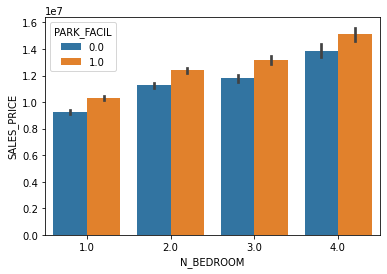

In [23]:
sns.barplot(df['N_BEDROOM'],df['SALES_PRICE'],data=df,hue=df['PARK_FACIL'])

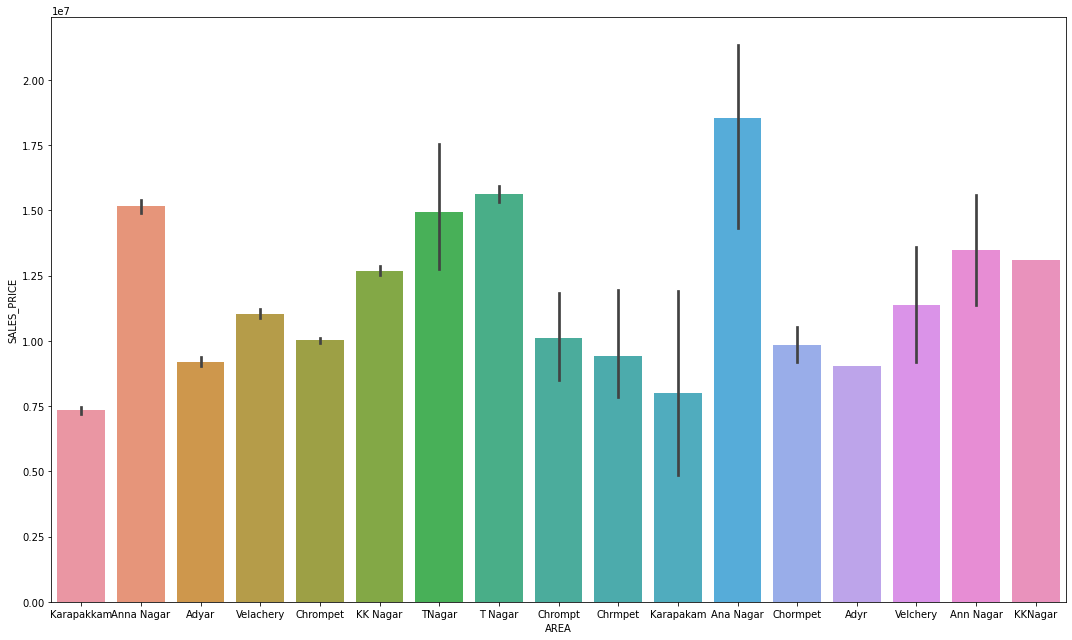

In [24]:
plt.figure(figsize=(15,9))
sns.barplot(df['AREA'],df['SALES_PRICE'],data=df)
plt.tight_layout()

In [25]:
df['AREA'].value_counts()

Chrompet      1679
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     780
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [26]:
df.loc[df['AREA'] == 'Chrompt','AREA'] = 'Chrompet'

In [27]:
df.loc[df['AREA'] == 'Chrompt','AREA'] = 'Chrompet'
df.loc[df['AREA'] == 'Chrmpet','AREA'] = 'Chrompet'
df.loc[df['AREA'] == 'Chormpet','AREA'] = 'Chrompet'
df.loc[df['AREA'] == 'TNagar','AREA'] = 'T Nagar'
df.loc[df['AREA'] == 'Ana Nagar','AREA'] = 'Anna Nagar'
df.loc[df['AREA'] == 'Ann Nagar','AREA'] = 'Anna Nagar'
df.loc[df['AREA'] == 'Karapakam','AREA'] = 'Karapakkam'
df.loc[df['AREA'] == 'Velchery','AREA'] = 'Velachery'
df.loc[df['AREA'] == 'KKNagar','AREA'] = 'KK Nagar'
df.loc[df['AREA'] == 'Adyr','AREA'] = 'Adyar'

In [28]:
df['AREA'].value_counts()

Chrompet      1699
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     785
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

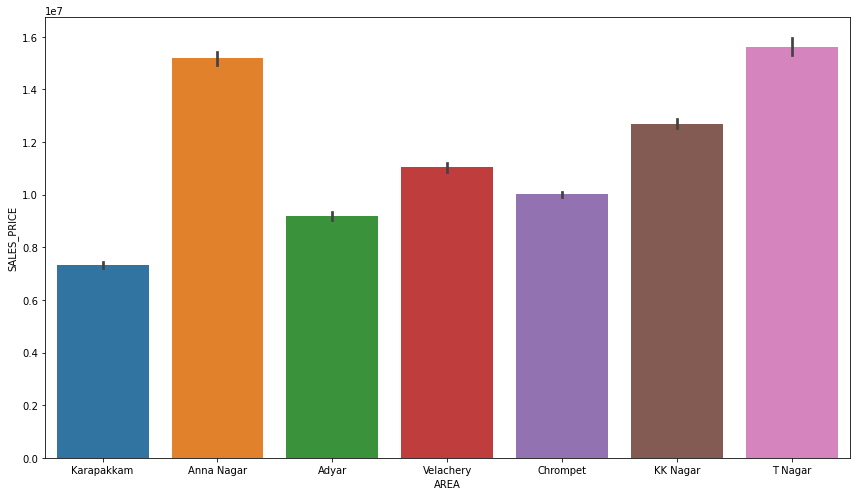

In [29]:
plt.figure(figsize=(12,7))
sns.barplot(df['AREA'],df['SALES_PRICE'],data=df)
plt.tight_layout()

In [30]:
for i in df.columns.values:
    print(df[i].value_counts())
    print("\n\n\n\n")

P00190    1
P07077    1
P05247    1
P08742    1
P06145    1
         ..
P01668    1
P08201    1
P03050    1
P05074    1
P04675    1
Name: PRT_ID, Length: 7103, dtype: int64





Chrompet      1699
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     785
Adyar          774
T Nagar        501
Name: AREA, dtype: int64





1781    18
1538    15
1514    13
1505    13
1655    12
        ..
2467     1
2455     1
1516     1
2427     1
2087     1
Name: INT_SQFT, Length: 1699, dtype: int64





06-10-2009    12
17-11-2010    10
12-04-2011    10
15-03-2012    10
06-01-2009    10
              ..
16-07-2004     1
01-02-2006     1
24-11-2008     1
24-11-2007     1
03-05-2007     1
Name: DATE_SALE, Length: 2797, dtype: int64





39     55
51     53
78     52
77     49
156    48
       ..
33     24
167    24
136    24
12     23
25     20
Name: DIST_MAINROAD, Length: 201, dtype: int64





1.0    3791
2.0    2351
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64





1.0    55

In [31]:
df.loc[df['SALE_COND'] == 'Partiall','SALE_COND'] = 'Partial'
df.loc[df['SALE_COND'] == 'PartiaLl','SALE_COND'] = 'Partial'
df.loc[df['SALE_COND'] == 'Ab Normal','SALE_COND'] = 'AbNormal'
df.loc[df['SALE_COND'] == 'Adj Land','SALE_COND'] = 'AdjLand'

In [32]:
df.loc[df['BUILDTYPE'] == 'Comercial','BUILDTYPE'] = 'Commercial'
df.loc[df['BUILDTYPE'] == 'Other','BUILDTYPE'] = 'Others'

In [33]:
df.loc[df['UTILITY_AVAIL'] == 'All Pub','UTILITY_AVAIL'] = 'AllPub'

In [34]:
df.loc[df['STREET'] == 'Pavd','STREET'] = 'Paved'
df.loc[df['STREET'] == 'NoAccess','STREET'] = 'No Access'

In [35]:
for i in df.columns.values:
    print(df[i].value_counts())
    print("\n\n\n\n")

P00190    1
P07077    1
P05247    1
P08742    1
P06145    1
         ..
P01668    1
P08201    1
P03050    1
P05074    1
P04675    1
Name: PRT_ID, Length: 7103, dtype: int64





Chrompet      1699
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     785
Adyar          774
T Nagar        501
Name: AREA, dtype: int64





1781    18
1538    15
1514    13
1505    13
1655    12
        ..
2467     1
2455     1
1516     1
2427     1
2087     1
Name: INT_SQFT, Length: 1699, dtype: int64





06-10-2009    12
17-11-2010    10
12-04-2011    10
15-03-2012    10
06-01-2009    10
              ..
16-07-2004     1
01-02-2006     1
24-11-2008     1
24-11-2007     1
03-05-2007     1
Name: DATE_SALE, Length: 2797, dtype: int64





39     55
51     53
78     52
77     49
156    48
       ..
33     24
167    24
136    24
12     23
25     20
Name: DIST_MAINROAD, Length: 201, dtype: int64





1.0    3791
2.0    2351
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64





1.0    55

<AxesSubplot:xlabel='STREET', ylabel='SALES_PRICE'>

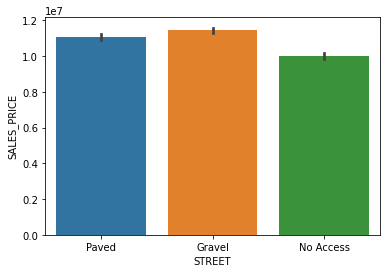

In [36]:
sns.barplot(df['STREET'],df['SALES_PRICE'],data=df)

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

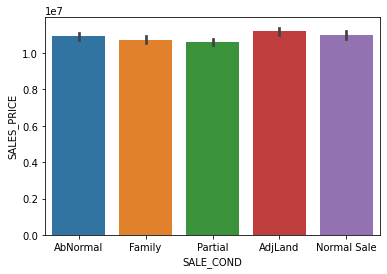

In [37]:
sns.barplot(df['SALE_COND'],df['SALES_PRICE'],data=df)

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

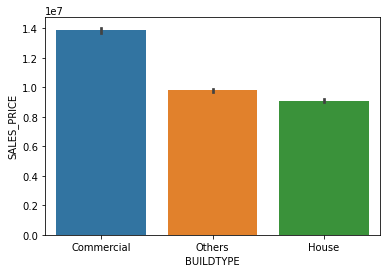

In [38]:
sns.barplot(df['BUILDTYPE'],df['SALES_PRICE'],data=df)

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

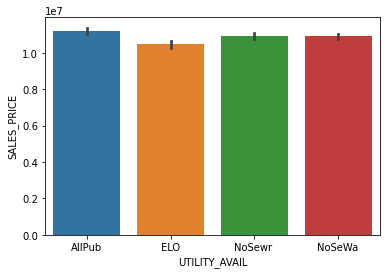

In [39]:
sns.barplot(df['UTILITY_AVAIL'],df['SALES_PRICE'],data=df)

<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE'>

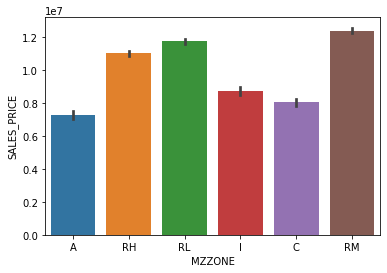

In [40]:
sns.barplot(df['MZZONE'],df['SALES_PRICE'],data=df)

In [41]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE      1.000000
REG_FEE          0.878126
COMMIS           0.626413
INT_SQFT         0.612026
N_ROOM           0.602637
N_BEDROOM        0.330933
PARK_FACIL       0.146158
N_BATHROOM       0.108884
QS_ROOMS         0.021960
QS_OVERALL       0.019784
DIST_MAINROAD    0.018679
QS_BEDROOM       0.018430
QS_BATHROOM     -0.011361
Name: SALES_PRICE, dtype: float64

<Figure size 1008x936 with 0 Axes>

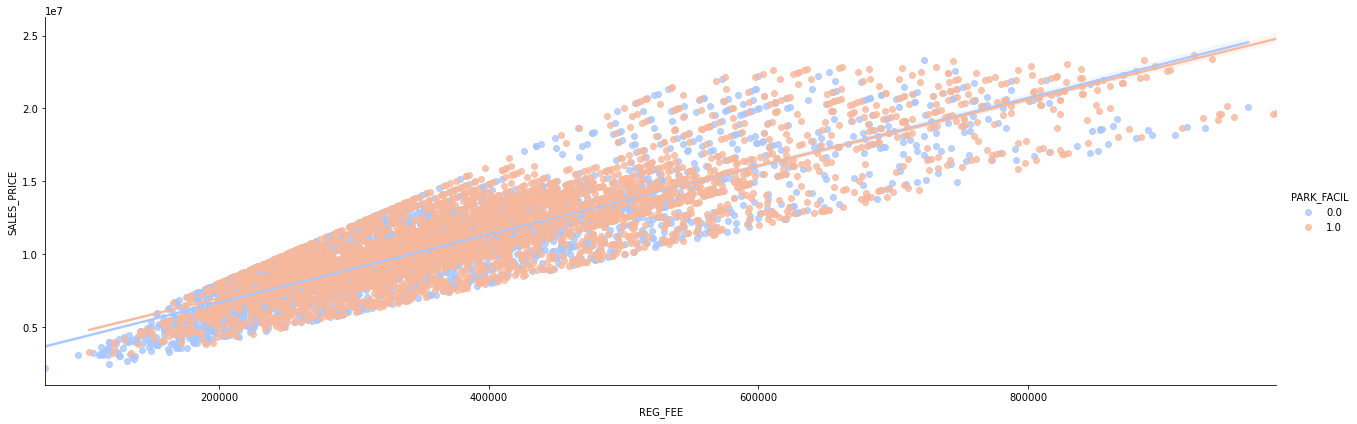

In [42]:
plt.figure(figsize = (14,13))
sns.lmplot(x = 'REG_FEE',y = 'SALES_PRICE', data = df,hue='PARK_FACIL',palette = 'coolwarm',aspect=3,height=6)

In [43]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

<AxesSubplot:xlabel='REG_FEE', ylabel='SALES_PRICE'>

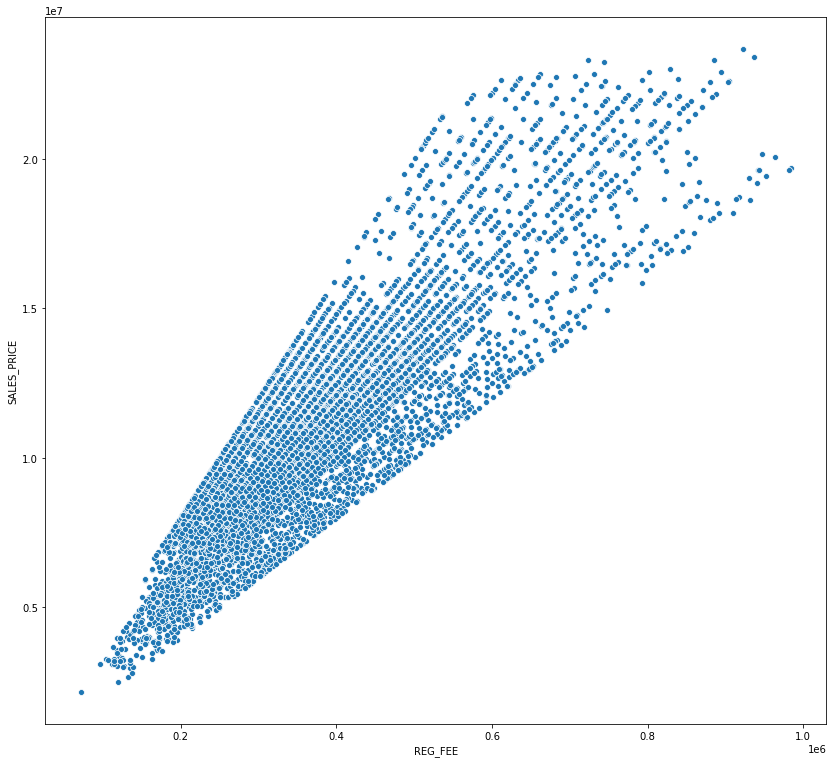

In [44]:
plt.figure(figsize = (14,13))
sns.scatterplot(x = 'REG_FEE',y = 'SALES_PRICE', data = df)#,hue='PARK_FACIL',palette = 'coolwarm')

In [45]:
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])

In [46]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,1.0,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,0.0,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,1.0,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,0.0,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,1.0,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [47]:
df_6_less  = df[df['DATE_SALE'] < '2006-01-01']
df_6_10 = df[(df['DATE_SALE'] < '2010-01-01') & (df['DATE_SALE'] >= '2006-01-01')]
df_10_14 = df[(df['DATE_SALE'] < '2014-01-01') & (df['DATE_SALE'] >= '2010-01-01')]
df_14_more = df[df['DATE_SALE'] >= '2014-01-01']

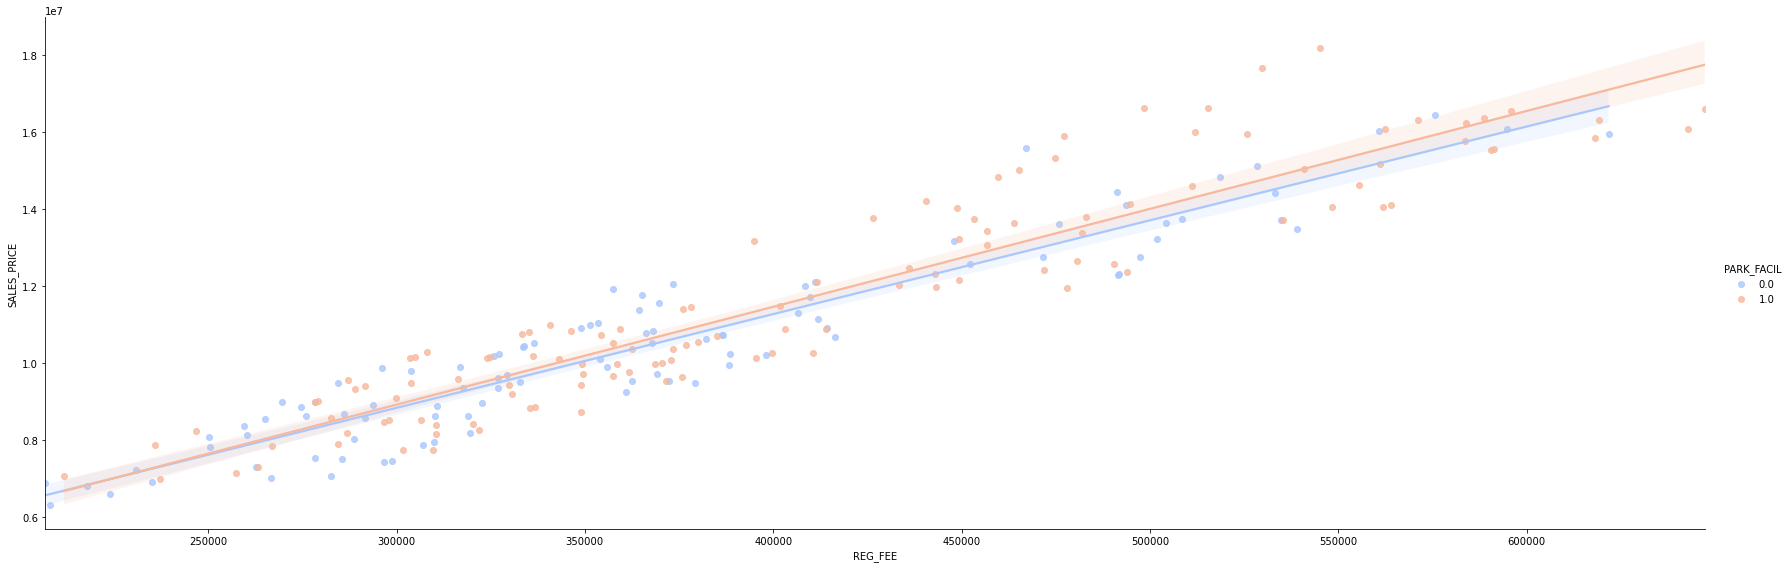

In [48]:
sns.lmplot(x = 'REG_FEE',y = 'SALES_PRICE', data = df_6_less,hue='PARK_FACIL',palette = 'coolwarm',aspect=3,height=8)

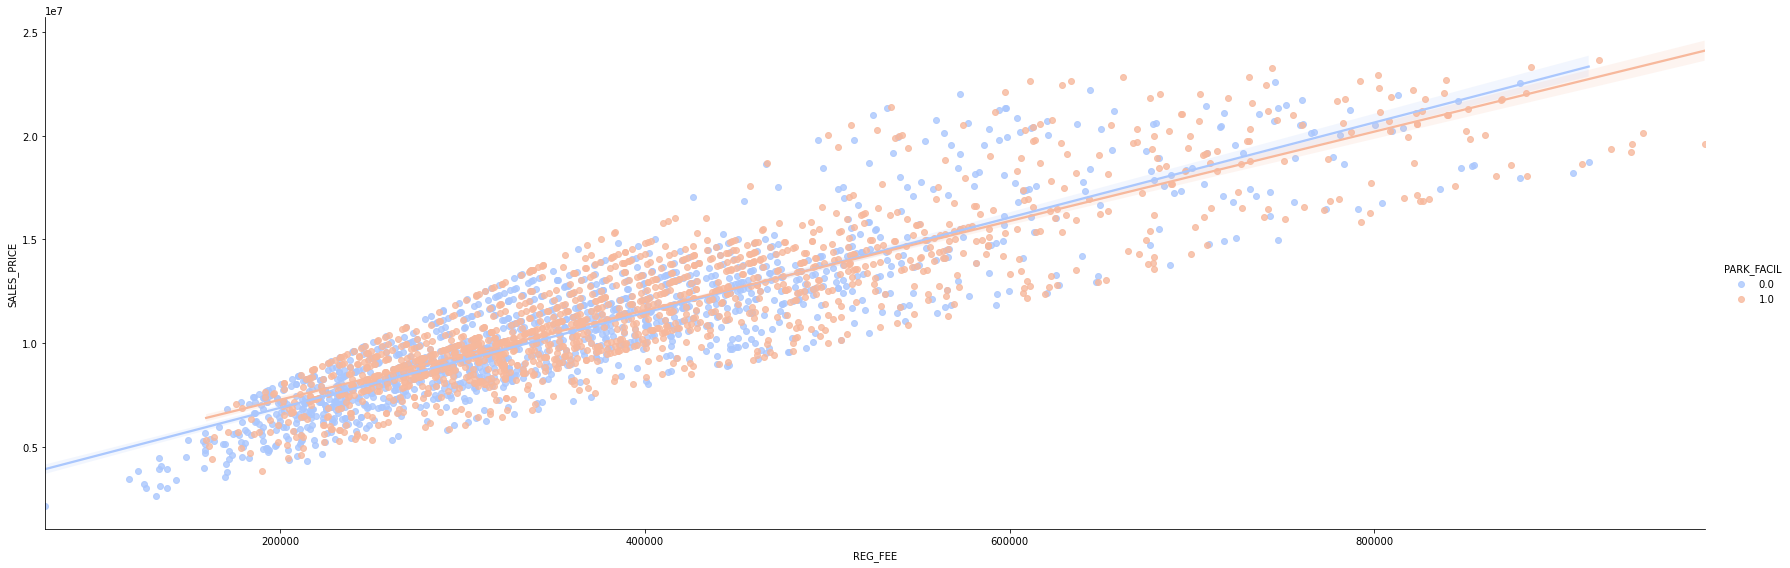

In [49]:
sns.lmplot(x = 'REG_FEE',y = 'SALES_PRICE', data = df_6_10,hue='PARK_FACIL',palette = 'coolwarm',aspect=3,height=8)

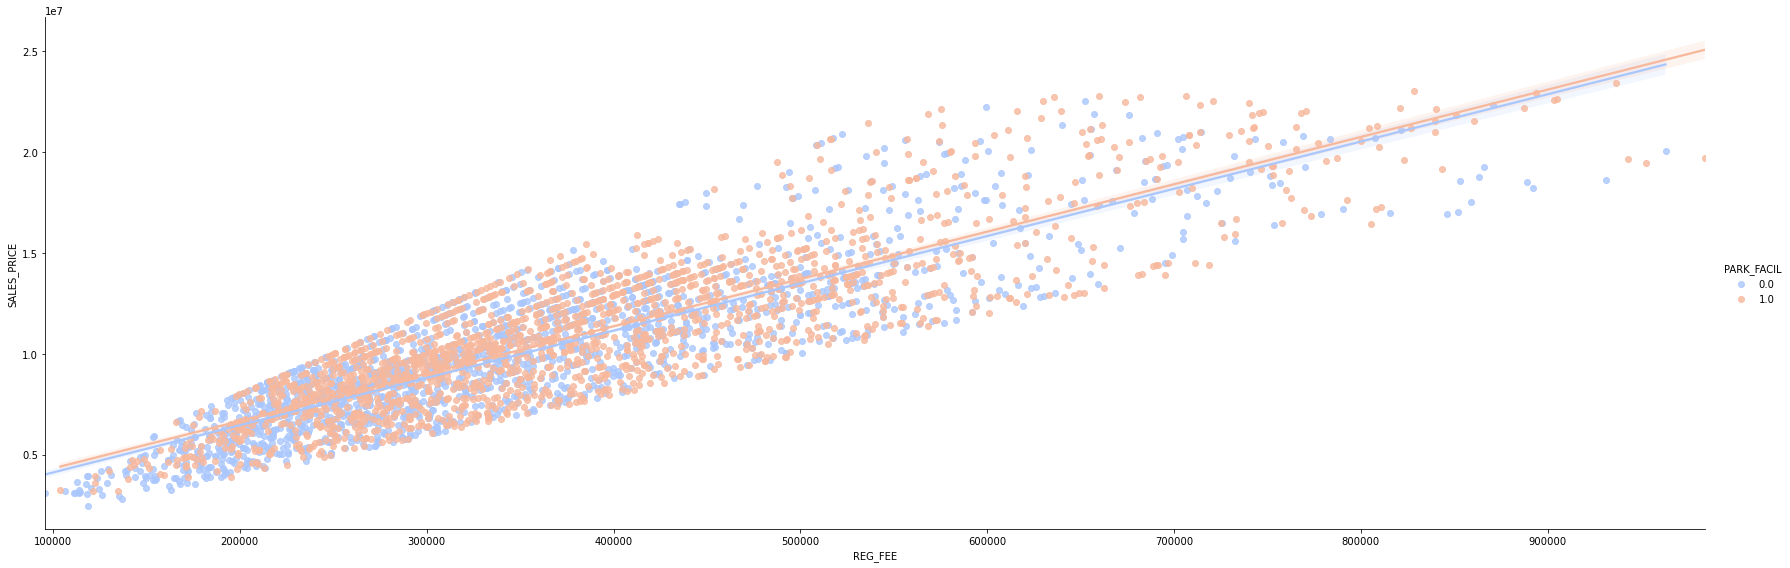

In [50]:
sns.lmplot(x = 'REG_FEE',y = 'SALES_PRICE', data = df_10_14,hue='PARK_FACIL',palette = 'coolwarm',aspect=3,height=8)

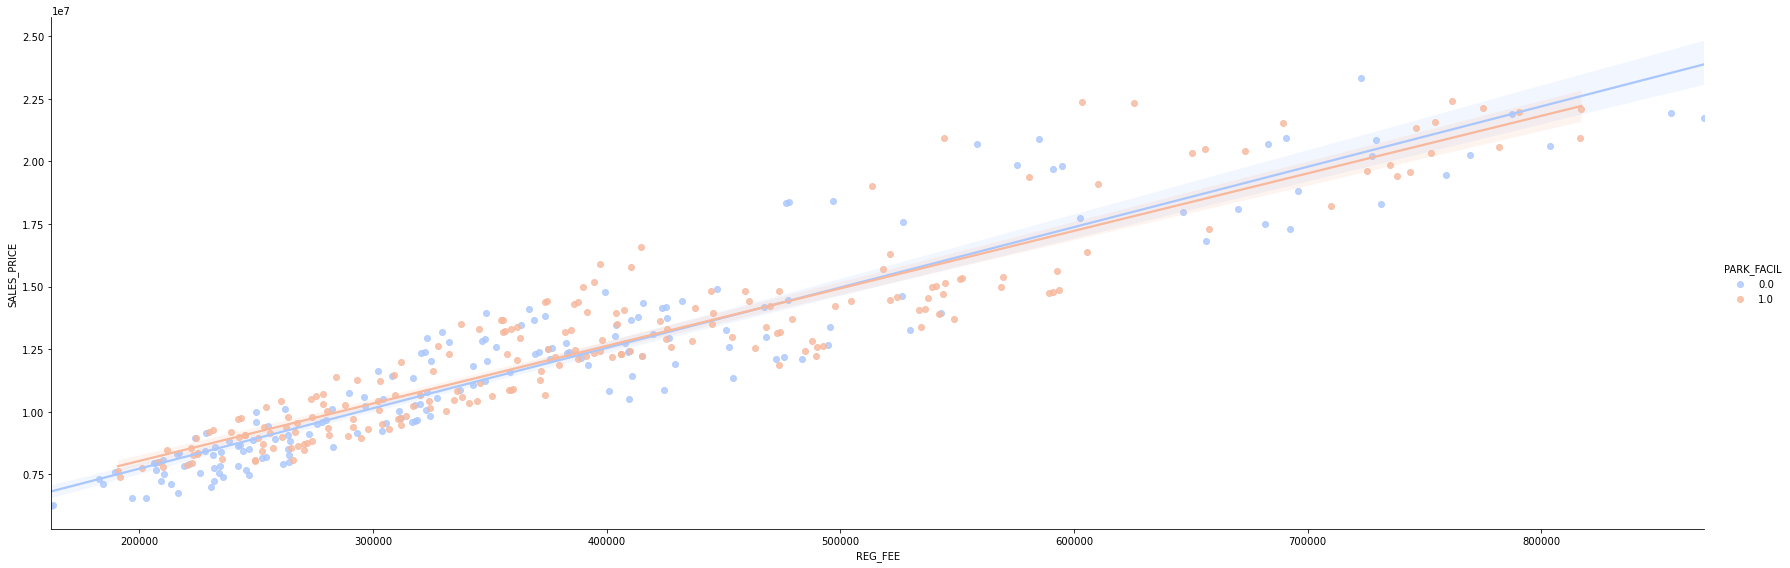

In [51]:
sns.lmplot(x = 'REG_FEE',y = 'SALES_PRICE', data = df_14_more,hue='PARK_FACIL',palette = 'coolwarm',aspect=3,height=8)

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

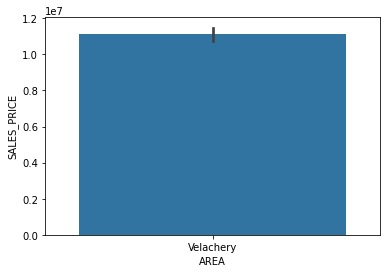

In [52]:
sns.barplot(x='AREA', y='SALES_PRICE',data = df_6_less)

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

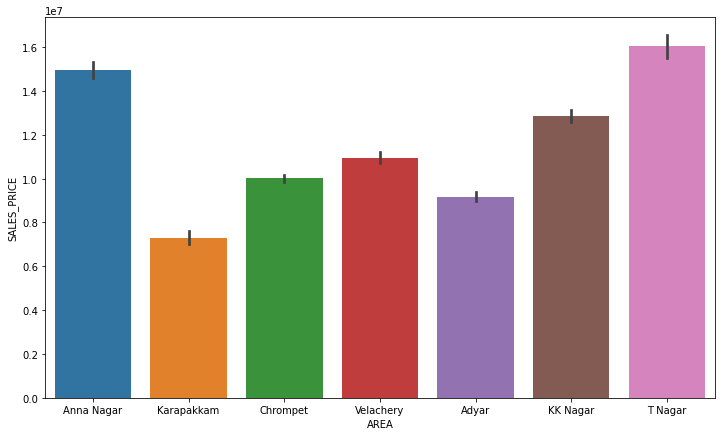

In [53]:
plt.figure(figsize = (12,7))
sns.barplot(x='AREA', y='SALES_PRICE',data = df_6_10)

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

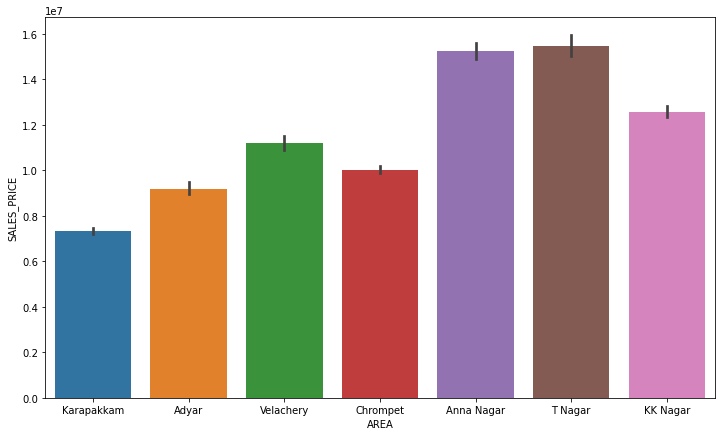

In [54]:
plt.figure(figsize = (12,7))
sns.barplot(x='AREA', y='SALES_PRICE',data = df_10_14)

<AxesSubplot:xlabel='AREA', ylabel='SALES_PRICE'>

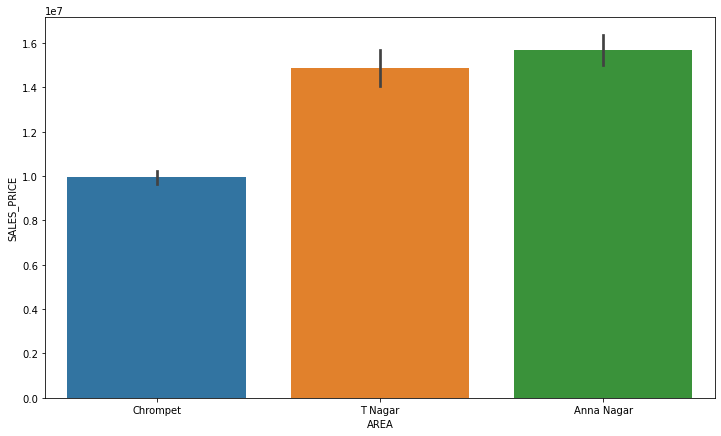

In [55]:
plt.figure(figsize = (12,7))
sns.barplot(x='AREA', y='SALES_PRICE',data = df_14_more)

In [56]:
df_annanagar = df[df['AREA'] == 'Anna Nagar']
df_tnagar = df[df['AREA']== 'T Nagar']
df_velachery = df[df['AREA'] == 'Velachery']
df_chrompet = df[df['AREA'] == 'Chrompet']
df_karapakkam = df[df['AREA'] == 'Karapakkam']
df_adyar = df[df['AREA'] == 'Adyar']
df_kknagar = df[df['AREA'] == 'KK Nagar']

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

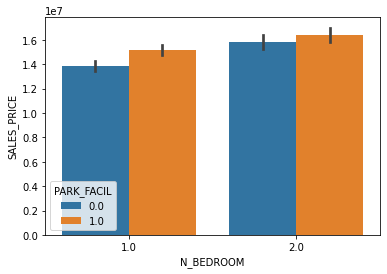

In [57]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df_annanagar,hue='PARK_FACIL')

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

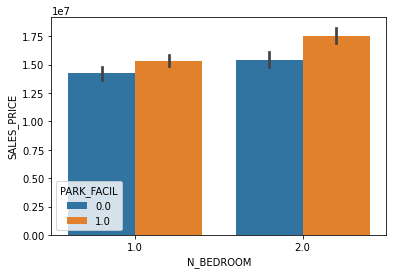

In [58]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df_tnagar,hue='PARK_FACIL')

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

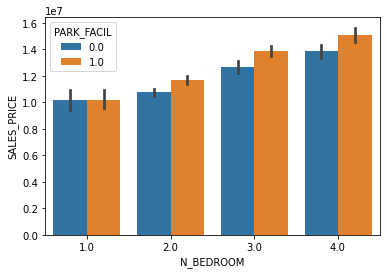

In [59]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df_kknagar,hue='PARK_FACIL')

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

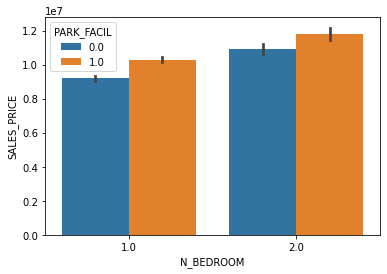

In [60]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df_chrompet,hue='PARK_FACIL')

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

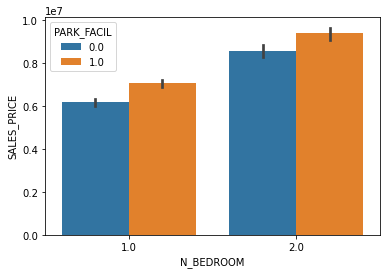

In [61]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df_karapakkam,hue='PARK_FACIL')

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

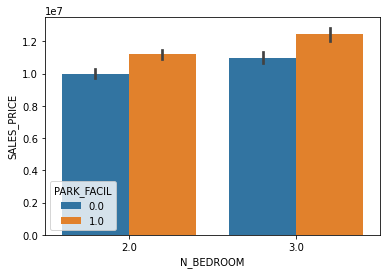

In [62]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df_velachery,hue='PARK_FACIL')

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

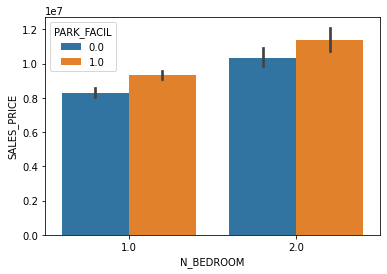

In [63]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df_adyar,hue='PARK_FACIL')

In [64]:
df.dropna(inplace=True)

In [65]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7101 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7101 non-null   object        
 1   AREA           7101 non-null   object        
 2   INT_SQFT       7101 non-null   int64         
 3   DATE_SALE      7101 non-null   datetime64[ns]
 4   DIST_MAINROAD  7101 non-null   int64         
 5   N_BEDROOM      7101 non-null   float64       
 6   N_BATHROOM     7101 non-null   float64       
 7   N_ROOM         7101 non-null   int64         
 8   SALE_COND      7101 non-null   object        
 9   PARK_FACIL     7101 non-null   float64       
 10  DATE_BUILD     7101 non-null   datetime64[ns]
 11  BUILDTYPE      7101 non-null   object        
 12  UTILITY_AVAIL  7101 non-null   object        
 13  STREET         7101 non-null   object        
 14  MZZONE         7101 non-null   object        
 15  QS_ROOMS       7101 n

In [67]:
df['AGE_OF_BUILDING'] = (df['DATE_SALE'] - df['DATE_BUILD']).dt.days

In [68]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_BUILDING
0,P03210,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,1.0,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16031
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,0.0,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015
2,P01812,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,1.0,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7152
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,0.0,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030
4,P06210,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,1.0,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10802


In [69]:
df.drop(['PRT_ID','DATE_SALE','DATE_BUILD'],axis=1,inplace=True)

In [70]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,1.0,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16031
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,0.0,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015
2,Adyar,909,70,1.0,1.0,3,AbNormal,1.0,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7152
3,Velachery,1855,14,3.0,2.0,5,Family,0.0,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,1.0,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10802


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7101 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AREA             7101 non-null   object 
 1   INT_SQFT         7101 non-null   int64  
 2   DIST_MAINROAD    7101 non-null   int64  
 3   N_BEDROOM        7101 non-null   float64
 4   N_BATHROOM       7101 non-null   float64
 5   N_ROOM           7101 non-null   int64  
 6   SALE_COND        7101 non-null   object 
 7   PARK_FACIL       7101 non-null   float64
 8   BUILDTYPE        7101 non-null   object 
 9   UTILITY_AVAIL    7101 non-null   object 
 10  STREET           7101 non-null   object 
 11  MZZONE           7101 non-null   object 
 12  QS_ROOMS         7101 non-null   float64
 13  QS_BATHROOM      7101 non-null   float64
 14  QS_BEDROOM       7101 non-null   float64
 15  QS_OVERALL       7101 non-null   float64
 16  REG_FEE          7101 non-null   int64  
 17  COMMIS        

In [72]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,1.0,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,16031
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,0.0,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015
2,Adyar,909,70,1.0,1.0,3,AbNormal,1.0,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,7152
3,Velachery,1855,14,3.0,2.0,5,Family,0.0,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,8030
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,1.0,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,10802


In [73]:
df = pd.get_dummies(df,drop_first=True)

In [74]:
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,1.0,4.0,3.9,4.9,4.330,...,0,0,0,0,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,0.0,4.9,4.2,2.5,3.765,...,0,0,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,1.0,4.1,3.8,2.2,3.090,...,1,0,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,0.0,4.7,3.9,3.6,4.010,...,0,0,1,0,1,0,1,0,0,0
4,1226,84,1.0,1.0,3,1.0,3.0,2.5,4.1,3.290,...,0,0,0,0,0,1,0,0,0,0


In [75]:
df.shape

(7101, 36)

In [76]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE              1.000000
REG_FEE                  0.878094
COMMIS                   0.626339
INT_SQFT                 0.612375
N_ROOM                   0.602798
AREA_Anna Nagar          0.400428
AREA_T Nagar             0.345077
N_BEDROOM                0.331099
MZZONE_RM                0.235147
AREA_KK Nagar            0.193049
PARK_FACIL               0.146158
MZZONE_RL                0.137515
N_BATHROOM               0.108770
SALE_COND_AdjLand        0.042363
STREET_Paved             0.032152
MZZONE_RH                0.022482
QS_ROOMS                 0.021633
QS_OVERALL               0.019974
DIST_MAINROAD            0.018780
QS_BEDROOM               0.018740
AREA_Velachery           0.016854
SALE_COND_Normal Sale    0.013270
UTILITY_AVAIL_NoSewr     0.004326
UTILITY_AVAIL_NoSeWa    -0.000198
QS_BATHROOM             -0.011116
SALE_COND_Family        -0.021200
SALE_COND_Partial       -0.037164
UTILITY_AVAIL_ELO       -0.058512
AGE_OF_BUILDING         -0.118841
AREA_Chrompet 

## Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X1 = df.drop('SALES_PRICE',axis=1)
y1 = df['SALES_PRICE']

In [80]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3)

In [81]:
linear_model = LinearRegression()

In [82]:
linear_model.fit(X1_train,y1_train)

LinearRegression()

In [83]:
pred = linear_model.predict(X1_test)

In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [85]:
print(mean_absolute_error(y1_test,pred))

491404.90371357877


In [86]:
df.describe()['SALES_PRICE']

count    7.101000e+03
mean     1.089573e+07
std      3.769610e+06
min      2.156875e+06
25%      8.271200e+06
50%      1.033505e+07
75%      1.299453e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [87]:
print(mean_squared_error(y1_test,pred))

448737494250.42084


In [88]:
print(np.sqrt(mean_squared_error(y1_test,pred)))

669878.7160750973


In [89]:
print(explained_variance_score(y1_test,pred))

0.9671887848862436


In [245]:
accuracy = linear_model.score(X1_test,y1_test)
print(accuracy*100)                   #Accuracy of linear model

96.71831011766199


## ANN

In [90]:
X = df.drop('SALES_PRICE',axis=1).values
y = df['SALES_PRICE'].values

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [94]:
scaler.fit(X_train)

MinMaxScaler()

In [95]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

In [195]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1, patience = 40)

In [196]:
model = Sequential()

In [197]:
model.add(Dense(35,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(17,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(8,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(4,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(1))


In [198]:
model.compile(optimizer = 'adam', loss='mse')

In [199]:
model.fit(x = X_train, y = y_train, epochs = 1000, validation_data = (X_test,y_test), verbose = 10, callbacks = [early_stop])

Train on 4970 samples, validate on 2131 samples
Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/

In [201]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

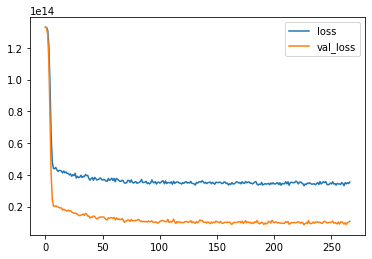

In [202]:
loss_df.plot()

In [203]:
model.history.history

{'loss': [132921259738637.39,
  132810285844198.97,
  131005975896100.27,
  121416036731831.89,
  96526534589956.33,
  64716271088138.51,
  48120793429782.766,
  44059585074284.375,
  43737100763722.79,
  44674907895640.695,
  43133203167387.766,
  42098028964498.49,
  42811734192334.04,
  42662067549809.94,
  42317798897734.055,
  41250278400464.82,
  42366496729298.16,
  41264097135023.03,
  41810032316045.13,
  40812658053421.64,
  40917014158974.3,
  39938970760752.01,
  40537689132612.61,
  39065920690038.37,
  40054101062345.71,
  39442037348115.47,
  40977940653479.195,
  37934695338127.4,
  39025758323657.195,
  38279084291618.82,
  38483012298138.016,
  39703501864116.08,
  38295776114289.94,
  39073223871237.875,
  38759023132586.29,
  40104702797783.62,
  39580663066823.445,
  39541089103062.69,
  37571967965982.59,
  36594067515885.664,
  37645224642041.61,
  38242130312932.49,
  36527646772606.81,
  38383343977971.02,
  37610706611737.76,
  36690467183720.26,
  36981417232

In [204]:
model.evaluate(X_test,y_test)

2131/2131 [==============================] - 0s 30us/sample - loss: 10643600362553.1836


10643600362553.182

In [205]:
predi = model.predict(X_test)

In [206]:
predi = pd.Series(predi.reshape(2131,))

In [207]:
pred_df = pd.DataFrame(y_test)
pred_df = pd.concat([pred_df,predi] , axis=1)
pred_df.columns = ['Test True Y', 'Predicted Y']

<AxesSubplot:xlabel='Test True Y', ylabel='Predicted Y'>

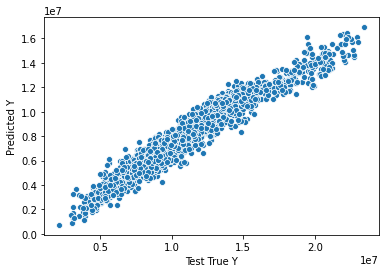

In [208]:
sns.scatterplot(x='Test True Y',y='Predicted Y',data=pred_df)

In [209]:
print(np.sqrt(mean_squared_error(y_test,predi)))

3262453.1392188272


In [210]:
print(mean_absolute_error(y_test,predi))

2992194.881921633


In [211]:
print(explained_variance_score(y_test,predi))       #Accuracy of neural network

0.8832861942462447


In [146]:
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,1.0,4.0,3.9,4.9,4.330,...,0,0,0,0,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,0.0,4.9,4.2,2.5,3.765,...,0,0,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,1.0,4.1,3.8,2.2,3.090,...,1,0,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,0.0,4.7,3.9,3.6,4.010,...,0,0,1,0,1,0,1,0,0,0
4,1226,84,1.0,1.0,3,1.0,3.0,2.5,4.1,3.290,...,0,0,0,0,0,1,0,0,0,0


### Inputting new values and checking the predicted values

In [213]:
new_value = df.drop('SALES_PRICE',axis=1).iloc[0].values
new_value = new_value.reshape(-1,35)

In [214]:
new_value_ans = df.iloc[0]['SALES_PRICE']

In [215]:
new_value = scaler.transform(new_value)

In [216]:
model_predicted_new_value_ans = model.predict(new_value)

In [217]:
new_value_ans - model_predicted_new_value_ans

array([[1237443.5]], dtype=float32)

In [218]:
new_value3 = df.drop('SALES_PRICE',axis=1).iloc[3].values
new_value3 = new_value3.reshape(-1,35)

In [219]:
new_value3_ans = df.iloc[3]['SALES_PRICE']

In [220]:
linearmodel_predicted_new_value_ans = linear_model.predict(new_value3)

In [221]:
new_value3_ans - linearmodel_predicted_new_value_ans

array([-86980.16968408])

In [222]:
new_value3_scaled = scaler.transform(new_value3)

In [223]:
model_predicted_new_value3_ans = model.predict(new_value3_scaled)

In [224]:
new_value3_ans - model_predicted_new_value3_ans

array([[2300537.5]], dtype=float32)

In [225]:
from sklearn import metrics

In [226]:
metrics.r2_score(y1_test,pred)

0.9671831011766199

In [227]:
metrics.r2_score(y_test,predi)

0.26871538352559976

In [230]:
accuracy = linear_model.score(X1_test,y1_test)
print(accuracy*100)                   #Accuracy of linear model

96.71831011766199


## Random Forest Regressor

In [232]:
from sklearn.ensemble import RandomForestRegressor

In [239]:
regressor = RandomForestRegressor(n_estimators = 500)

In [240]:
regressor.fit(X1_train,y1_train)

RandomForestRegressor(n_estimators=500)

In [241]:
pred_rfc = regressor.predict(X1_test)

In [242]:
accuracy_rfc = regressor.score(X1_test,y1_test)
print(accuracy_rfc*100)      

96.11573613488186


In [243]:
print(explained_variance_score(y1_test,pred_rfc))

0.9611983038262497


In [244]:
accuracy_rfc = regressor.score(X1_train,y1_train)
print(accuracy_rfc*100)  #Training data

99.4792812061171
